In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [126]:
%matplotlib inline

In [3]:
train =pd.read_csv('titanic_train.csv') #Reading the dataset

In [4]:
train.head() #Checking the head of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

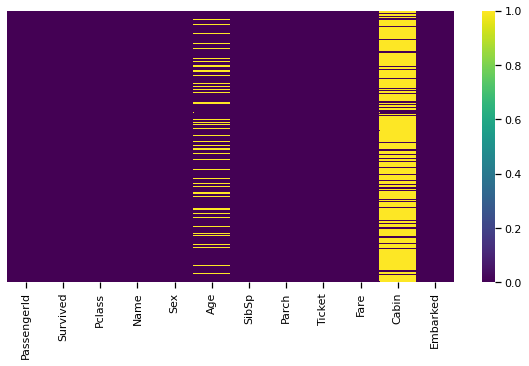

In [22]:
plt.rc("figure", figsize=(10,5))
sns.set_context('notebook')
sns.heatmap(train.isnull(),yticklabels = False,cmap='viridis') #observing null values in the data


In [23]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

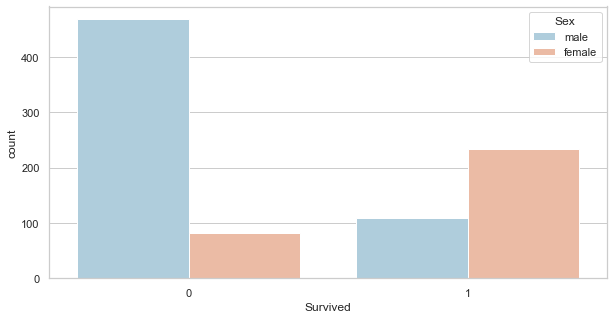

In [25]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r') #observing trend in survivors on basis of sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

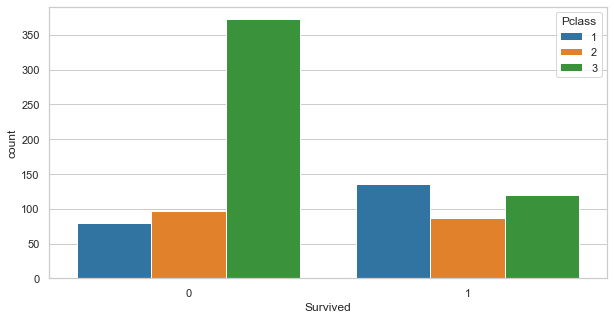

In [26]:
sns.countplot(x='Survived',hue='Pclass',data=train) #observing trend in survivors on basis of class

<AxesSubplot:xlabel='Age'>

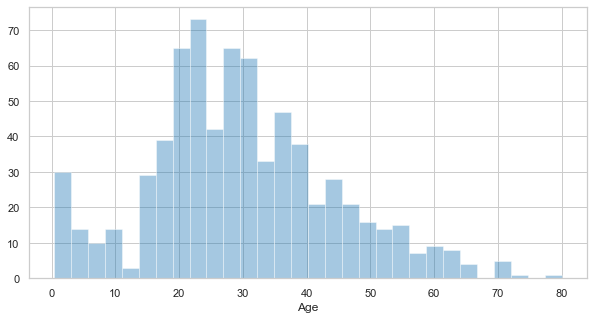

In [28]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30) #observing age distribution of people on-board

<AxesSubplot:xlabel='SibSp', ylabel='count'>

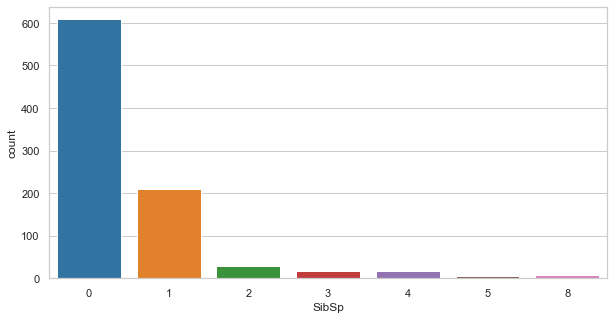

In [30]:
sns.countplot(x='SibSp',data=train) #observing sibling/spouse trend

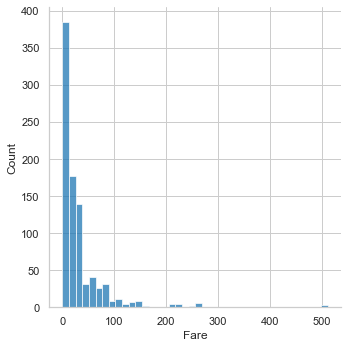

In [34]:
sns.displot(x='Fare',data=train,bins=40) #observing distribution of fare

In [36]:
import cufflinks as cf

In [37]:
cf.go_offline()

In [41]:
train['Fare'].iplot(kind='hist',bins=40) #interactive distribution of fare with cufflinks

# Cleaning date by filling missing data

In [43]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [44]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

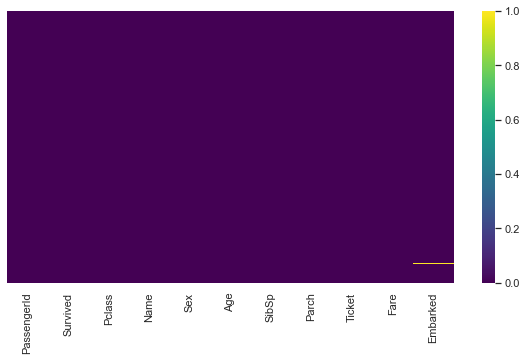

In [51]:
sns.heatmap(train.isnull(),yticklabels = False,cmap='viridis')

In [50]:
train.drop('Cabin',axis=1,inplace=True)

In [52]:
train.dropna(inplace=True)

<AxesSubplot:>

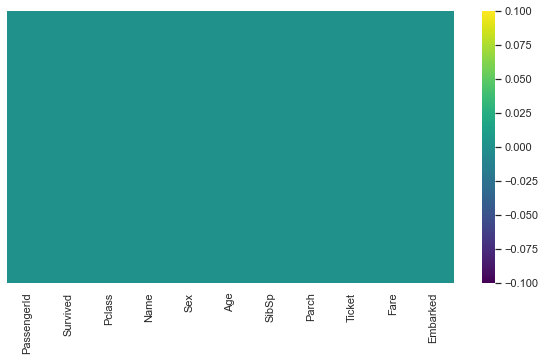

In [53]:
sns.heatmap(train.isnull(),yticklabels = False,cmap='viridis')

In [60]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)

In [63]:
Embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [64]:
train = pd.concat([train,Sex,Embarked],axis=1)

In [65]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [71]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [72]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


# Cleaning test data

In [73]:
test = pd.read_csv('titanic_test.csv')

In [74]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [76]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [78]:
Sex = pd.get_dummies(test['Sex'],drop_first=True)

In [83]:
Embarked = pd.get_dummies(test['Embarked'],drop_first=True)

In [84]:
test = pd.concat([test,Sex,Embarked],axis=1)

In [85]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1


In [86]:
test.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [88]:
test.dropna(inplace=True)

In [89]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [90]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [137]:
XTR = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','S']].head(417) #iniliazing training data
YTR = train['Survived'].head(417)


In [95]:
XTT = test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','S']] #iniliazing test data


In [96]:
from sklearn.linear_model import LogisticRegression

In [139]:
logmodel = LogisticRegression(max_iter=200)

In [140]:
logmodel.fit(XTR,YTR)

C:\Users\xdaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=200)

In [141]:
Predictions =logmodel.predict(XTT)

In [118]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [144]:
print(classification_report(YTR,Predictions))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60       255
           1       0.34      0.31      0.32       162

    accuracy                           0.50       417
   macro avg       0.46      0.47      0.46       417
weighted avg       0.49      0.50      0.50       417



In [145]:
print(confusion_matrix(YTR,Predictions))

[[159  96]
 [112  50]]


# End of the project